In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.utils import to_categorical
from tensorflow import keras

In [4]:
import tensorflow as tf
from tensorflow.keras import utils

In [5]:
import os 
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms

In [6]:
import PIL
import PIL.Image

In [33]:
# ! pip install torch

In [34]:
# ! pip install torchvision

In [ ]:
# 방법1

In [31]:
# file_path = './dogs/dog_img/'
# for i in os.listdir('dogs/dog_img/'): 

#     src = os.path.join(file_path, i)
#     a = i.split('-')[1]
#     os.rename(src, a)
# #     print(i)

    

In [36]:
trans = transforms.Compose([transforms.Resize((100,100)),
                           transforms.ToTensor(),
                           transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                           ])
trainset = torchvision.datasets.ImageFolder(root='dogs', transform=trans)

In [37]:
trainset.__getitem__(18)

(tensor([[[-0.0196,  0.1373,  0.2706,  ...,  0.7098,  0.4745,  0.0275],
          [ 0.0588,  0.2784,  0.3569,  ...,  0.3176,  0.2471,  0.1137],
          [-0.0745, -0.0745, -0.0431,  ...,  0.1686,  0.1843,  0.1765],
          ...,
          [-0.1843,  0.0588,  0.0275,  ...,  0.7176,  0.7961,  0.8902],
          [ 0.3490,  0.3725,  0.2784,  ...,  0.7725,  0.8275,  0.8588],
          [ 0.5608,  0.4824,  0.5529,  ...,  0.7804,  0.8118,  0.8510]],
 
         [[ 0.1451,  0.3647,  0.5216,  ...,  0.7020,  0.5294,  0.1451],
          [ 0.2392,  0.4902,  0.5765,  ...,  0.4039,  0.3412,  0.2471],
          [ 0.0824,  0.0588,  0.0902,  ...,  0.2235,  0.2078,  0.2471],
          ...,
          [ 0.1451,  0.3725,  0.3490,  ...,  0.5451,  0.6627,  0.8196],
          [ 0.5294,  0.5686,  0.4980,  ...,  0.6863,  0.7569,  0.8039],
          [ 0.5922,  0.5765,  0.6784,  ...,  0.7333,  0.7647,  0.8196]],
 
         [[-0.2392, -0.2784,  0.0667,  ...,  0.2392,  0.0745, -0.2784],
          [ 0.0118,  0.1529,

In [38]:
len(trainset)

20580

In [39]:
classes = trainset.classes
classes

['Afghan_hound',
 'African_hunting_dog',
 'Airedale',
 'American_Staffordshire_terrier',
 'Appenzeller',
 'Australian_terrier',
 'Bedlington_terrier',
 'Bernese_mountain_dog',
 'Blenheim_spaniel',
 'Border_collie',
 'Border_terrier',
 'Boston_bull',
 'Bouvier_des_Flandres',
 'Brabancon_griffon',
 'Brittany_spaniel',
 'Cardigan',
 'Chesapeake_Bay_retriever',
 'Chihuahua',
 'Dandie_Dinmont',
 'Doberman',
 'English_foxhound',
 'English_setter',
 'English_springer',
 'EntleBucher',
 'Eskimo_dog',
 'French_bulldog',
 'German_shepherd',
 'German_short',
 'Gordon_setter',
 'Great_Dane',
 'Great_Pyrenees',
 'Greater_Swiss_Mountain_dog',
 'Ibizan_hound',
 'Irish_setter',
 'Irish_terrier',
 'Irish_water_spaniel',
 'Irish_wolfhound',
 'Italian_greyhound',
 'Japanese_spaniel',
 'Kerry_blue_terrier',
 'Labrador_retriever',
 'Lakeland_terrier',
 'Leonberg',
 'Lhasa',
 'Maltese_dog',
 'Mexican_hairless',
 'Newfoundland',
 'Norfolk_terrier',
 'Norwegian_elkhound',
 'Norwich_terrier',
 'Old_English_she

In [43]:
trainset

Dataset ImageFolder
    Number of datapoints: 20580
    Root location: dogs
    StandardTransform
Transform: Compose(
               Resize(size=(100, 100), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

torch.Size([16, 3, 100, 100])
(3, 410, 410)
(410, 410, 3)
torch.Size([16, 3, 100, 100])
torch.Size([3, 206, 818])
Afghan_houndAfghan_houndAfghan_houndAfghan_houndAfghan_houndAfghan_houndAfghan_houndAfghan_houndAfghan_houndAfghan_houndAfghan_houndAfghan_houndAfghan_houndAfghan_houndAfghan_houndAfghan_hound


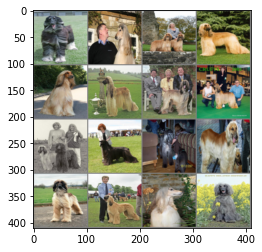

In [53]:
def imshow(img):
    img = img / 2 +0.5
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1,2,0)))
    
    print(np_img.shape)
    print((np.transpose(np_img,(1,2,0))).shape)
    
print(images.shape)
imshow(torchvision.utils.make_grid(images, nrow=4))
print(images.shape)
print((torchvision.utils.make_grid(images)).shape)
print(''.join('%5s'%classes[labels[j]] for j in range(16)))

In [56]:
trainset_array = np.array(trainset)

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_8728/2268947351.py:1: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  trainset_array = np.array(trainset)
C:\Users\bitcamp\AppData\Local\Temp/ipykernel_8728/2268947351.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  trainset_array = np.array(trainset)


In [58]:
len(trainset_array)

20580

In [163]:
trainset_array

array([[tensor([[[ 0.5686,  0.5608,  0.5059,  ..., -0.1608, -0.1529, -0.1294],
                 [ 0.1059,  0.0588,  0.0275,  ..., -0.2078, -0.2314, -0.2392],
                 [-0.3490, -0.3647, -0.3569,  ..., -0.2706, -0.2706, -0.2627],
                 ...,
                 [-0.0275, -0.1529, -0.0510,  ...,  0.0353,  0.0196,  0.0431],
                 [-0.1608, -0.2314, -0.1529,  ...,  0.0353,  0.0510,  0.1608],
                 [-0.1843, -0.1922, -0.1765,  ..., -0.0039,  0.0510,  0.1922]],

                [[ 0.6471,  0.6392,  0.5843,  ..., -0.0118, -0.0039,  0.0196],
                 [ 0.1843,  0.1373,  0.1059,  ..., -0.0745, -0.0980, -0.1059],
                 [-0.2627, -0.2784, -0.2706,  ..., -0.1529, -0.1529, -0.1373],
                 ...,
                 [ 0.2471,  0.1137,  0.1922,  ...,  0.2706,  0.2549,  0.2863],
                 [ 0.1608,  0.0667,  0.0980,  ...,  0.2706,  0.2863,  0.3961],
                 [ 0.1294,  0.1137,  0.0902,  ...,  0.2471,  0.2627,  0.3882]],

    

In [280]:
(train_input, train_target), (test_input, test_target) = keras.datasets.trainset.load_data()

AttributeError: module 'keras.api._v2.keras.datasets' has no attribute 'trainset'

In [ ]:
# 방법 2

In [105]:
dataset_path = pathlib.Path('./dogs')
image_count = len(list(dataset_path.glob('*/*.jpg')))
print(image_count)

20580


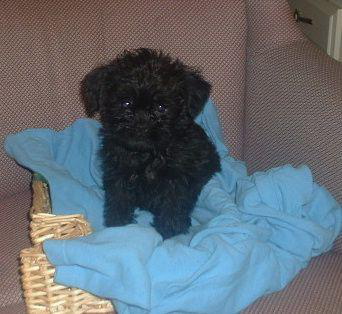

In [106]:
affenpinscher = list(dataset_path.glob('affenpinscher/*'))
PIL.Image.open(str(affenpinscher[1]))

In [129]:
batch_size = 32
img_height = 50
img_width = 50

In [130]:
train_set = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 20580 files belonging to 120 classes.
Using 16464 files for training.


In [131]:
test_set = tf.keras.preprocessing.image_dataset_from_directory(
  dataset_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 20580 files belonging to 120 classes.
Using 4116 files for validation.


In [134]:
class_names = train_set.class_names
print(class_names)
print(len(class_names))

['Afghan_hound', 'African_hunting_dog', 'Airedale', 'American_Staffordshire_terrier', 'Appenzeller', 'Australian_terrier', 'Bedlington_terrier', 'Bernese_mountain_dog', 'Blenheim_spaniel', 'Border_collie', 'Border_terrier', 'Boston_bull', 'Bouvier_des_Flandres', 'Brabancon_griffon', 'Brittany_spaniel', 'Cardigan', 'Chesapeake_Bay_retriever', 'Chihuahua', 'Dandie_Dinmont', 'Doberman', 'English_foxhound', 'English_setter', 'English_springer', 'EntleBucher', 'Eskimo_dog', 'French_bulldog', 'German_shepherd', 'German_short', 'Gordon_setter', 'Great_Dane', 'Great_Pyrenees', 'Greater_Swiss_Mountain_dog', 'Ibizan_hound', 'Irish_setter', 'Irish_terrier', 'Irish_water_spaniel', 'Irish_wolfhound', 'Italian_greyhound', 'Japanese_spaniel', 'Kerry_blue_terrier', 'Labrador_retriever', 'Lakeland_terrier', 'Leonberg', 'Lhasa', 'Maltese_dog', 'Mexican_hairless', 'Newfoundland', 'Norfolk_terrier', 'Norwegian_elkhound', 'Norwich_terrier', 'Old_English_sheepdog', 'Pekinese', 'Pembroke', 'Pomeranian', 'Rho

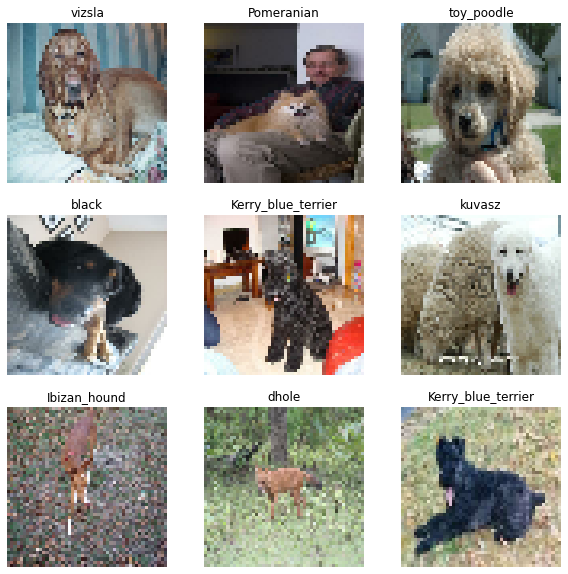

In [135]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_set.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [136]:
for image_batch, labels_batch in train_set:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 50, 50, 3)
(32,)


In [137]:
normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [138]:
normalized_ds = train_set.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [139]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_set.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = test_set.cache().prefetch(buffer_size=AUTOTUNE)

In [140]:
num_classes = 120

model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
# model.summary()

In [117]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [118]:
hist = model.fit(train_ds, validation_data=val_ds, epochs=30, batch_size=30)

Epoch 1/30


C:\Users\bitcamp\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


515/515 [==============================] - 29s 54ms/step - loss: 4.7197 - accuracy: 0.0170 - val_loss: 4.4811 - val_accuracy: 0.0318
Epoch 2/30
515/515 [==============================] - 11s 22ms/step - loss: 4.3326 - accuracy: 0.0481 - val_loss: 4.3469 - val_accuracy: 0.0500
Epoch 3/30
515/515 [==============================] - 11s 22ms/step - loss: 4.0227 - accuracy: 0.0956 - val_loss: 4.3562 - val_accuracy: 0.0586
Epoch 4/30
515/515 [==============================] - 11s 22ms/step - loss: 3.5289 - accuracy: 0.1767 - val_loss: 4.7279 - val_accuracy: 0.0586
Epoch 5/30
515/515 [==============================] - 11s 22ms/step - loss: 2.9891 - accuracy: 0.2843 - val_loss: 5.0531 - val_accuracy: 0.0564
Epoch 6/30
515/515 [==============================] - 11s 22ms/step - loss: 2.4330 - accuracy: 0.3974 - val_loss: 5.8181 - val_accuracy: 0.0491
Epoch 7/30
515/515 [==============================] - 11s 22ms/step - loss: 2.0118 - accuracy: 0.4848 - val_loss: 6.7907 - val_accuracy: 0.0420
Epo

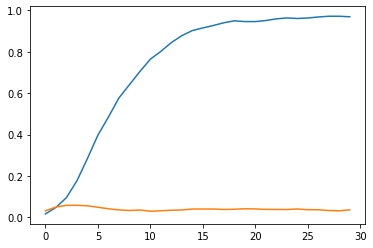

In [119]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

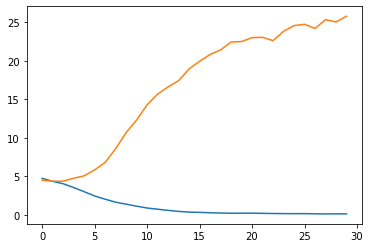

In [120]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [141]:
num_classes = 120

model = tf.keras.Sequential()
tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Conv2D(32, 3, activation='relu'))
model.add(MaxPooling2D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


In [142]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [160]:
hist = model.fit(train_ds, validation_data=val_ds, epochs=50, batch_size=30)

Epoch 1/50
515/515 [==============================] - 3s 6ms/step - loss: 2.6737 - accuracy: 0.3885 - val_loss: 22.8865 - val_accuracy: 0.0238
Epoch 2/50
515/515 [==============================] - 3s 5ms/step - loss: 2.7157 - accuracy: 0.3841 - val_loss: 23.4092 - val_accuracy: 0.0250
Epoch 3/50
515/515 [==============================] - 3s 5ms/step - loss: 2.6610 - accuracy: 0.3918 - val_loss: 24.4144 - val_accuracy: 0.0265
Epoch 4/50
515/515 [==============================] - 3s 5ms/step - loss: 2.6389 - accuracy: 0.3992 - val_loss: 23.7430 - val_accuracy: 0.0248
Epoch 5/50
515/515 [==============================] - 3s 5ms/step - loss: 2.6575 - accuracy: 0.3933 - val_loss: 25.4555 - val_accuracy: 0.0238
Epoch 6/50
515/515 [==============================] - 3s 5ms/step - loss: 2.6520 - accuracy: 0.3933 - val_loss: 24.6828 - val_accuracy: 0.0270
Epoch 7/50
515/515 [==============================] - 3s 5ms/step - loss: 2.6942 - accuracy: 0.3926 - val_loss: 25.0666 - val_accuracy: 0.0241

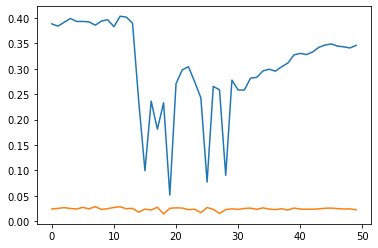

In [161]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

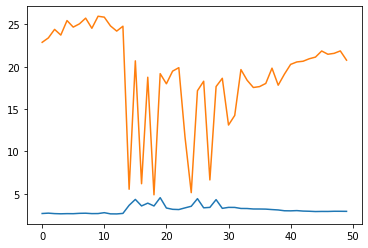

In [162]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [ ]:
# 방법3

In [7]:
from glob import glob

In [8]:
class_name = os.listdir('dogs')
class_name

['affenpinscher',
 'Afghan_hound',
 'African_hunting_dog',
 'Airedale',
 'American_Staffordshire_terrier',
 'Appenzeller',
 'Australian_terrier',
 'basenji',
 'basset',
 'beagle',
 'Bedlington_terrier',
 'Bernese_mountain_dog',
 'black',
 'Blenheim_spaniel',
 'bloodhound',
 'bluetick',
 'Border_collie',
 'Border_terrier',
 'borzoi',
 'Boston_bull',
 'Bouvier_des_Flandres',
 'boxer',
 'Brabancon_griffon',
 'briard',
 'Brittany_spaniel',
 'bull_mastiff',
 'cairn',
 'Cardigan',
 'Chesapeake_Bay_retriever',
 'Chihuahua',
 'chow',
 'clumber',
 'cocker_spaniel',
 'collie',
 'curly',
 'Dandie_Dinmont',
 'dhole',
 'dingo',
 'Doberman',
 'English_foxhound',
 'English_setter',
 'English_springer',
 'EntleBucher',
 'Eskimo_dog',
 'flat',
 'French_bulldog',
 'German_shepherd',
 'German_short',
 'giant_schnauzer',
 'golden_retriever',
 'Gordon_setter',
 'Greater_Swiss_Mountain_dog',
 'Great_Dane',
 'Great_Pyrenees',
 'groenendael',
 'Ibizan_hound',
 'Irish_setter',
 'Irish_terrier',
 'Irish_water_s

In [9]:
image_datas = glob('dogs/*/*.jpg')
image_datas

['dogs\\affenpinscher\\n02110627_10147.jpg',
 'dogs\\affenpinscher\\n02110627_10185.jpg',
 'dogs\\affenpinscher\\n02110627_10225.jpg',
 'dogs\\affenpinscher\\n02110627_10437.jpg',
 'dogs\\affenpinscher\\n02110627_10439.jpg',
 'dogs\\affenpinscher\\n02110627_10447.jpg',
 'dogs\\affenpinscher\\n02110627_10680.jpg',
 'dogs\\affenpinscher\\n02110627_10787.jpg',
 'dogs\\affenpinscher\\n02110627_10848.jpg',
 'dogs\\affenpinscher\\n02110627_10859.jpg',
 'dogs\\affenpinscher\\n02110627_10986.jpg',
 'dogs\\affenpinscher\\n02110627_11211.jpg',
 'dogs\\affenpinscher\\n02110627_11262.jpg',
 'dogs\\affenpinscher\\n02110627_11263.jpg',
 'dogs\\affenpinscher\\n02110627_11279.jpg',
 'dogs\\affenpinscher\\n02110627_11283.jpg',
 'dogs\\affenpinscher\\n02110627_11345.jpg',
 'dogs\\affenpinscher\\n02110627_11365.jpg',
 'dogs\\affenpinscher\\n02110627_11422.jpg',
 'dogs\\affenpinscher\\n02110627_11435.jpg',
 'dogs\\affenpinscher\\n02110627_11584.jpg',
 'dogs\\affenpinscher\\n02110627_11614.jpg',
 'dogs\\af

In [10]:
dic = dict()
for i,j in enumerate(class_name):
    dic[j] = i

In [11]:
x = []
y = []
for name in os.listdir('dogs'):
    path = 'dogs/{}/'.format(name)
#     print(path)
    for img in os.listdir(path):
        image = Image.open(os.path.join(path,img))
        image = image.resize((50,50))
        image = np.array(image)
        x.append(image)
        label = name
        label = dic[name]
        y.append(label)

In [331]:
x

[array([[[ 71,  72,  64],
         [ 99, 101,  90],
         [142, 144, 131],
         ...,
         [ 25,  25,  25],
         [ 29,  31,  32],
         [ 22,  24,  23]],
 
        [[ 59,  61,  49],
         [ 73,  75,  62],
         [114, 116, 101],
         ...,
         [ 19,  22,  22],
         [ 31,  33,  34],
         [ 23,  25,  24]],
 
        [[ 16,  17,  13],
         [ 20,  21,  15],
         [ 20,  21,  13],
         ...,
         [ 43,  41,  33],
         [ 32,  33,  31],
         [ 22,  25,  24]],
 
        ...,
 
        [[110,  68,  98],
         [113,  71, 101],
         [114,  72, 102],
         ...,
         [133,  96, 123],
         [147, 112, 136],
         [144, 111, 132]],
 
        [[108,  68,  98],
         [115,  75, 105],
         [116,  77, 106],
         ...,
         [124,  90, 117],
         [142, 109, 133],
         [147, 115, 136]],
 
        [[110,  71, 100],
         [115,  76, 105],
         [114,  75, 104],
         ...,
         [121,  87, 114],
  

In [211]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [19]:
xx=np.array([])
for a in x[:3]:
#     print(a)
    xx = np.append(xx, a)

In [20]:
len(xx)

22500

In [21]:
len(x)

20580

In [290]:
from sklearn.model_selection import train_test_split

In [314]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=100)

In [316]:
np.array(x_train)

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_8728/2851401987.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(x_train)


ValueError: could not broadcast input array from shape (50,50,3) into shape (50,50)

In [295]:
x_train.shape

(16464,)

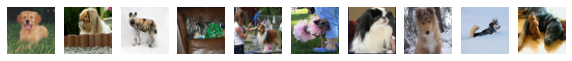

In [296]:
fig, axs =plt.subplots(1,10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(x_train[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [301]:
y_train[:10]

array([49, 61,  2, 80, 99, 17, 61, 33, 43, 91])

In [298]:
len(x_train)

16464

In [299]:
len(x_test)

4116

In [234]:
x_train[:10]

[array([[[ 37,  41,  44],
         [ 32,  36,  39],
         [ 33,  37,  40],
         ...,
         [ 33,  37,  35],
         [ 32,  37,  32],
         [ 31,  36,  30]],
 
        [[ 36,  40,  43],
         [ 33,  37,  40],
         [ 30,  34,  37],
         ...,
         [ 30,  34,  33],
         [ 29,  33,  33],
         [ 30,  34,  35]],
 
        [[ 29,  33,  36],
         [ 34,  38,  41],
         [ 32,  36,  39],
         ...,
         [ 29,  33,  32],
         [ 38,  41,  47],
         [ 36,  39,  45]],
 
        ...,
 
        [[118, 139,  87],
         [ 88, 111,  69],
         [120, 138,  99],
         ...,
         [ 74, 103,  58],
         [109, 134,  87],
         [ 86, 111,  64]],
 
        [[120, 145,  91],
         [102, 121,  80],
         [127, 140, 102],
         ...,
         [ 85, 117,  61],
         [ 72, 103,  57],
         [ 70, 102,  58]],
 
        [[132, 158, 101],
         [138, 157, 113],
         [143, 157, 116],
         ...,
         [ 89, 123,  66],
  

In [302]:
x_train

array([<PIL.Image.Image image mode=RGB size=50x50 at 0x27DEFA89BE0>,
       <PIL.Image.Image image mode=RGB size=50x50 at 0x27FCF8D1610>,
       <PIL.Image.Image image mode=RGB size=50x50 at 0x27F82BF0790>, ...,
       <PIL.Image.Image image mode=RGB size=50x50 at 0x27DEFD61160>,
       <PIL.Image.Image image mode=RGB size=50x50 at 0x27F802783A0>,
       <PIL.Image.Image image mode=RGB size=50x50 at 0x27D323DDD30>],
      dtype=object)

In [309]:
x_train = x_train.reshape(16464, 28*28)
x_test = x_test.reshape(4116, 28*28)

AttributeError: 'list' object has no attribute 'reshape'